In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("train.csv")

In [340]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [342]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [343]:
df[df["pickup_latitude"] == 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...
49625,2012-01-09 19:50:27.0000001,12.1,2012-01-09 19:50:27 UTC,0.0,0.0,0.0,0.0,1
49816,2012-02-20 00:54:00.000000100,4.9,2012-02-20 00:54:00 UTC,0.0,0.0,0.0,0.0,1
49845,2009-03-02 21:57:15.0000001,6.6,2009-03-02 21:57:15 UTC,0.0,0.0,0.0,0.0,3
49856,2010-04-19 17:25:00.000000170,10.9,2010-04-19 17:25:00 UTC,0.0,0.0,0.0,0.0,5


In [344]:
df = df[(df["pickup_latitude"] != 0) & (df["pickup_longitude"] != 0)]

In [345]:
df = df[(df["dropoff_latitude"] != 0) & (df["dropoff_longitude"] != 0)]

In [346]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [347]:
df.drop("key", axis=1, inplace=True)

In [348]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [349]:
df[df["fare_amount"] == 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10002,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
27891,0.0,2015-05-15 21:40:28 UTC,-74.077927,40.805714,-74.077919,40.805721,1
47302,0.0,2010-03-18 19:13:39 UTC,-73.942346,40.806269,-73.942463,40.806129,1


In [350]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        49000 non-null  float64            
 1   pickup_datetime    49000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   49000 non-null  float64            
 3   pickup_latitude    49000 non-null  float64            
 4   dropoff_longitude  49000 non-null  float64            
 5   dropoff_latitude   49000 non-null  float64            
 6   passenger_count    49000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 3.0 MB


In [352]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [353]:
df["distance"] = (((df["pickup_latitude"]) - (df["dropoff_latitude"]))**2 + ((df["pickup_longitude"]) - (df["dropoff_longitude"]))**2) ** 0.5

In [354]:
df.head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,0.038675
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,0.014565
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,0.045146
8,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,0.014258
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,0.026593


In [355]:
df = df[(df["pickup_latitude"] != df["dropoff_latitude"]) & (df["pickup_longitude"] != df["dropoff_longitude"])]

<Axes: xlabel='distance', ylabel='fare_amount'>

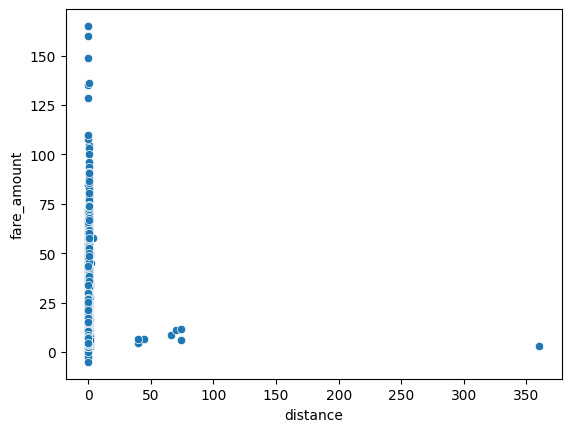

In [356]:
sns.scatterplot(df, x="distance", y="fare_amount")

In [357]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,48441.000000,48441.000000,48441.000000,48441.000000,48441.000000,48441.000000,48441.000000
mean,11.354857,-73.927389,40.710813,-73.920575,40.703064,1.670630,0.051017
std,9.507123,2.321169,2.818480,2.409599,2.302457,1.291878,1.790008
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000001
25%,6.000000,-73.992316,40.736493,-73.991333,40.735868,1.000000,0.013156
50%,8.500000,-73.982134,40.753442,-73.980495,40.754131,1.000000,0.022118
75%,12.500000,-73.968483,40.767783,-73.965427,40.768519,2.000000,0.039405
max,165.000000,40.783472,401.083332,40.851027,43.415190,6.000000,360.304405


In [358]:
df = df[df["passenger_count"] != 0]

In [359]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,48283.000000,48283.000000,48283.000000,48283.000000,48283.000000,48283.000000,48283.000000
mean,11.360817,-73.927234,40.710685,-73.920414,40.702910,1.676097,0.051080
std,9.515441,2.324962,2.823086,2.413536,2.306219,1.290445,1.792933
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,0.000001
25%,6.000000,-73.992324,40.736494,-73.991334,40.735875,1.000000,0.013153
50%,8.500000,-73.982135,40.753448,-73.980499,40.754135,1.000000,0.022120
75%,12.500000,-73.968478,40.767794,-73.965450,40.768509,2.000000,0.039428
max,165.000000,40.783472,401.083332,40.851027,43.415190,6.000000,360.304405


In [360]:
df = df[df["fare_amount"] > 0]

In [361]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000
mean,11.363030,-73.927227,40.710679,-73.920406,40.702902,1.676147,0.051087
std,9.514652,2.325154,2.823320,2.413735,2.306410,1.290483,1.793082
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,0.000001
25%,6.000000,-73.992321,40.736494,-73.991333,40.735876,1.000000,0.013156
50%,8.500000,-73.982135,40.753448,-73.980498,40.754135,1.000000,0.022126
75%,12.500000,-73.968480,40.767792,-73.965451,40.768501,2.000000,0.039438
max,165.000000,40.783472,401.083332,40.851027,43.415190,6.000000,360.304405


<Axes: xlabel='distance', ylabel='Count'>

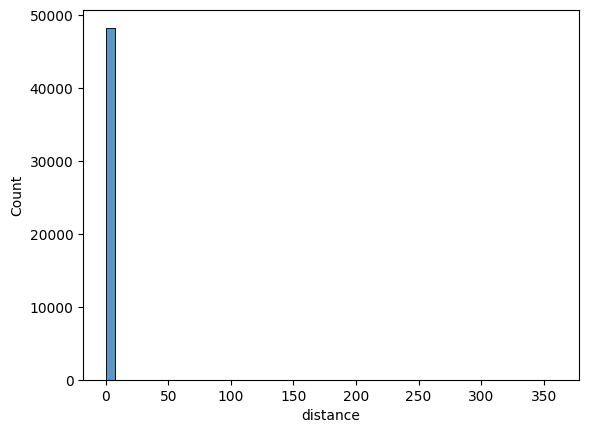

In [362]:
sns.histplot(df["distance"] , bins=50)

In [363]:
df = df[df["distance"] < 5 ]

<Axes: xlabel='fare_amount', ylabel='Count'>

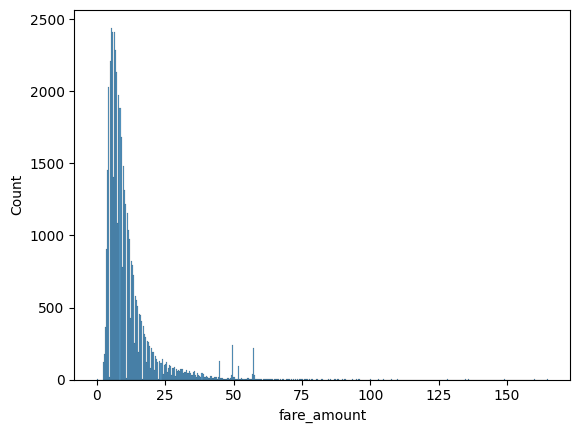

In [364]:
sns.histplot(df["fare_amount"])

<Axes: xlabel='distance', ylabel='Count'>

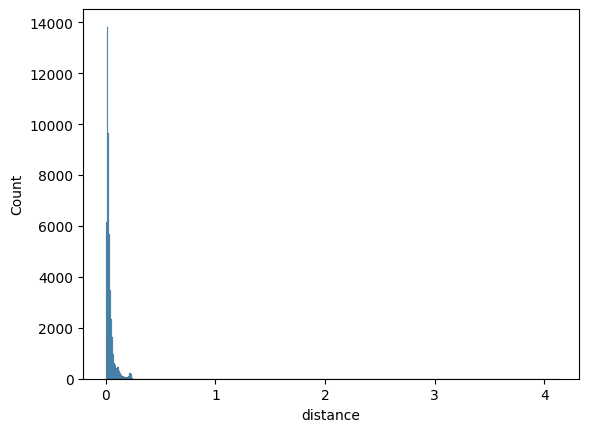

In [365]:
sns.histplot(df["distance"])

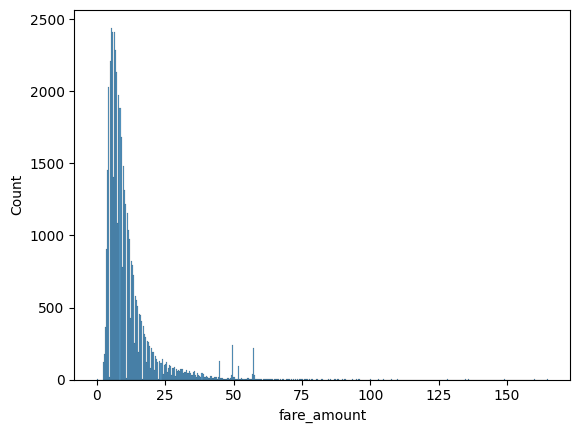

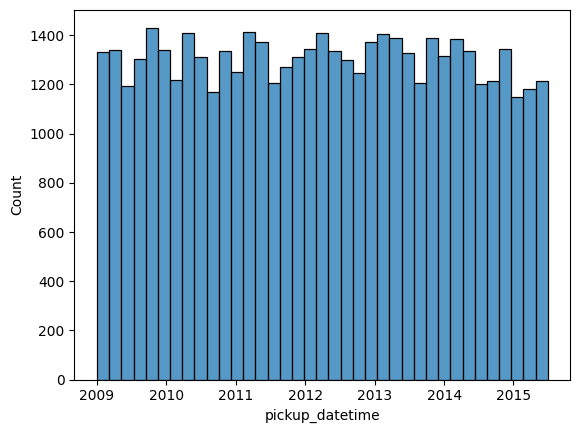

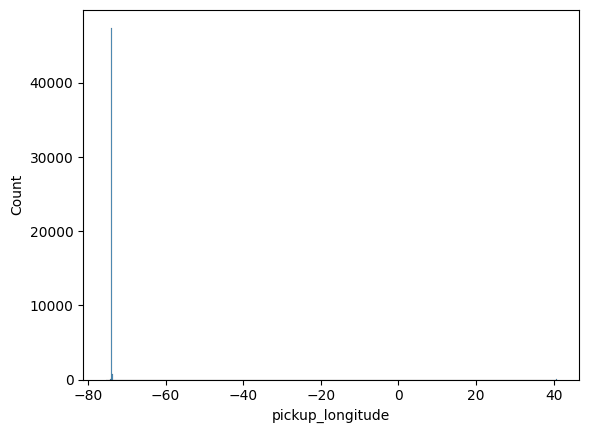

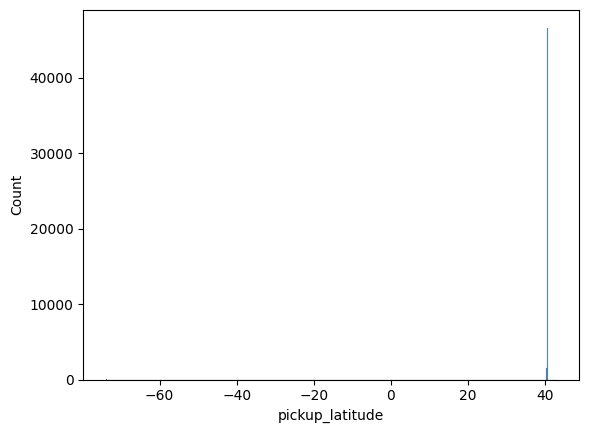

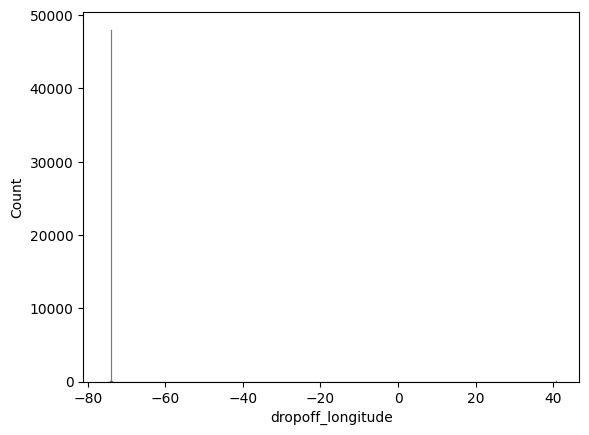

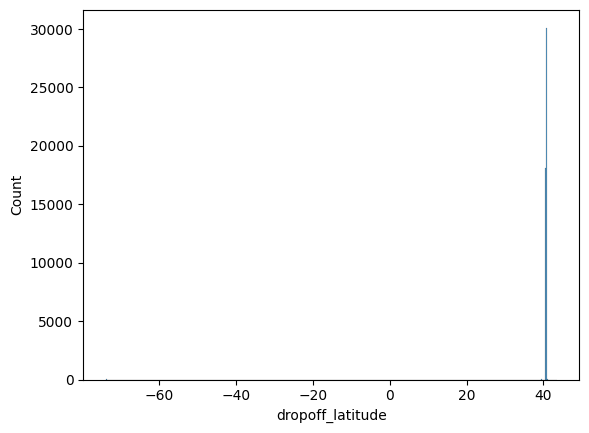

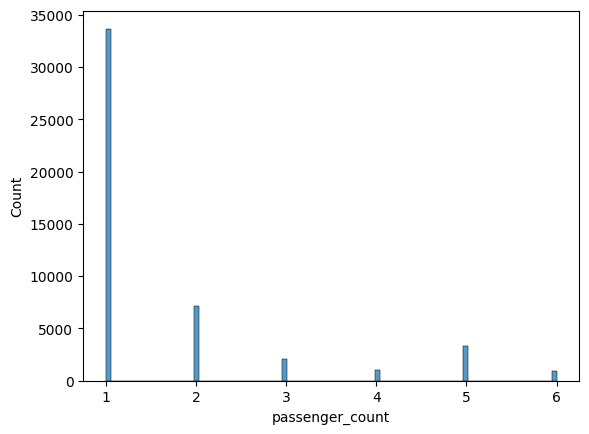

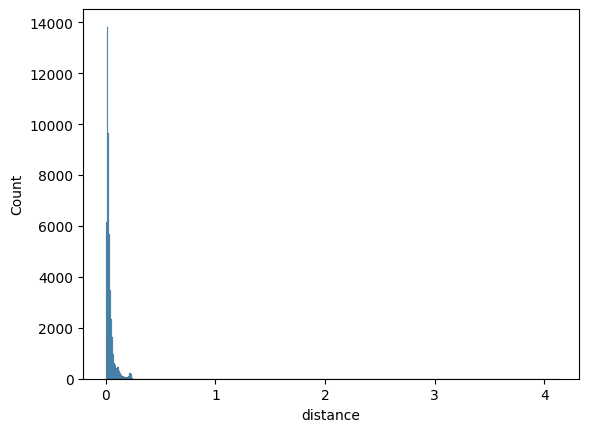

In [366]:
for column in df.columns:
    sns.histplot(df[column])
    plt.show()

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48267 entries, 0 to 49998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        48267 non-null  float64            
 1   pickup_datetime    48267 non-null  datetime64[ns, UTC]
 2   pickup_longitude   48267 non-null  float64            
 3   pickup_latitude    48267 non-null  float64            
 4   dropoff_longitude  48267 non-null  float64            
 5   dropoff_latitude   48267 non-null  float64            
 6   passenger_count    48267 non-null  int64              
 7   distance           48267 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 3.3 MB


In [368]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,48267.000000,48267.000000,48267.000000,48267.000000,48267.000000,48267.000000,48267.000000
mean,11.363711,-73.927218,40.704035,-73.926054,40.704615,1.676176,0.035176
std,9.515228,2.325347,2.291005,2.325399,2.291078,1.290555,0.049390
min,0.010000,-75.423848,-74.006893,-75.354559,-74.006377,1.000000,0.000001
25%,6.000000,-73.992319,40.736495,-73.991333,40.735877,1.000000,0.013155
50%,8.500000,-73.982134,40.753450,-73.980500,40.754135,1.000000,0.022120
75%,12.500000,-73.968480,40.767792,-73.965463,40.768501,2.000000,0.039409
max,165.000000,40.783472,43.098708,40.851027,43.415190,6.000000,4.110672


In [369]:
df.sort_values(by="fare_amount", ascending=False).head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
43956,165.00,2014-11-01 03:35:37+00:00,-73.931776,40.754153,-73.919801,40.797735,1,0.045197
1483,165.00,2009-08-07 21:49:13+00:00,-73.633363,41.032490,-73.633671,41.032598,1,0.000326
46198,160.00,2013-05-13 11:18:00+00:00,-73.644528,41.009100,-73.641208,41.021182,1,0.012530
26027,149.00,2014-08-14 20:22:14+00:00,-73.855030,40.729882,-73.855039,40.729884,4,0.000009
33502,136.00,2014-02-22 02:44:00+00:00,-73.989540,40.757032,-73.860580,41.147487,1,0.411200
25201,135.00,2013-12-16 10:56:58+00:00,-73.424988,40.779894,-73.423209,40.782906,1,0.003498
37215,128.61,2009-12-03 23:40:00+00:00,-73.995803,40.754868,-73.994898,40.754622,5,0.000938
25799,110.00,2014-02-07 03:35:00+00:00,-73.988032,40.731992,-73.988023,40.731960,1,0.000033
14142,108.00,2014-12-12 10:13:00+00:00,-74.013570,40.705930,-74.000740,40.738960,1,0.035434
12349,104.67,2010-05-01 15:23:00+00:00,-73.797225,40.639720,-73.840545,41.030892,1,0.393563


In [370]:
from math import radians, sin, cos, sqrt, asin

def haversine_distance(lat1, lon1, lat2, lon2):
    # Dünya'nın yarıçapı (km cinsinden)
    R = 6371

    # Tüm dereceleri radyan cinsine dönüştürme
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formülü
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = R * c
    return km

In [371]:
df["distance"] = df.apply(
    lambda row: haversine_distance(
        row['pickup_latitude'],
        row['pickup_longitude'],
        row['dropoff_latitude'],
        row['dropoff_longitude']
    ),
    axis=1
)

In [372]:
df["distance"].head(20)

0     1.030764
1     8.450134
2     1.389525
3     2.799270
4     1.999157
5     3.787239
6     1.555807
7     4.155444
8     1.253232
9     2.849627
10    1.374577
12    0.717767
13    2.019384
14    1.671445
16    2.609774
17    1.511904
18    0.921952
19    0.399179
20    1.686861
21    2.292470
Name: distance, dtype: float64

In [373]:
df.sort_values(by="fare_amount", ascending=False).head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
43956,165.00,2014-11-01 03:35:37+00:00,-73.931776,40.754153,-73.919801,40.797735,1,4.949892
1483,165.00,2009-08-07 21:49:13+00:00,-73.633363,41.032490,-73.633671,41.032598,1,0.028489
46198,160.00,2013-05-13 11:18:00+00:00,-73.644528,41.009100,-73.641208,41.021182,1,1.372030
26027,149.00,2014-08-14 20:22:14+00:00,-73.855030,40.729882,-73.855039,40.729884,4,0.000790
33502,136.00,2014-02-22 02:44:00+00:00,-73.989540,40.757032,-73.860580,41.147487,1,44.746988
25201,135.00,2013-12-16 10:56:58+00:00,-73.424988,40.779894,-73.423209,40.782906,1,0.366888
37215,128.61,2009-12-03 23:40:00+00:00,-73.995803,40.754868,-73.994898,40.754622,5,0.080989
25799,110.00,2014-02-07 03:35:00+00:00,-73.988032,40.731992,-73.988023,40.731960,1,0.003638
14142,108.00,2014-12-12 10:13:00+00:00,-74.013570,40.705930,-74.000740,40.738960,1,3.828609
12349,104.67,2010-05-01 15:23:00+00:00,-73.797225,40.639720,-73.840545,41.030892,1,43.648755


In [374]:
df = df[~((df['fare_amount'] > 50) & (df['distance'] < 0.5))]

In [375]:
df.sort_values(by="fare_amount", ascending=False).head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
43956,165.00,2014-11-01 03:35:37+00:00,-73.931776,40.754153,-73.919801,40.797735,1,4.949892
46198,160.00,2013-05-13 11:18:00+00:00,-73.644528,41.009100,-73.641208,41.021182,1,1.372030
33502,136.00,2014-02-22 02:44:00+00:00,-73.989540,40.757032,-73.860580,41.147487,1,44.746988
14142,108.00,2014-12-12 10:13:00+00:00,-74.013570,40.705930,-74.000740,40.738960,1,3.828609
12349,104.67,2010-05-01 15:23:00+00:00,-73.797225,40.639720,-73.840545,41.030892,1,43.648755
45761,103.00,2014-01-27 23:27:09+00:00,-73.866679,40.770102,-74.028570,40.747844,1,13.858229
46303,100.00,2012-01-27 21:49:00+00:00,-73.877328,40.772030,-73.669963,41.031032,1,33.662400
33183,96.25,2015-06-05 17:12:31+00:00,-73.994637,40.740231,-74.177429,40.690670,2,16.361959
30005,96.00,2012-05-07 18:52:00+00:00,-73.892575,40.766010,-74.037065,40.731182,1,12.772956
7810,95.00,2011-10-03 08:50:35+00:00,-73.862951,40.768771,-73.652193,40.657995,2,21.616360


In [376]:
df.sort_values(by="distance", ascending=False).head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
45139,57.54,2015-06-04 14:24:03+00:00,-70.140793,38.754215,-73.789780,40.646969,1,376.445536
46482,45.00,2011-03-18 17:35:27+00:00,-75.336082,40.646409,-73.953539,39.606622,1,164.874362
10710,3.70,2011-02-11 21:46:09+00:00,-73.955411,39.604164,-73.955647,40.772837,1,129.950483
14536,4.10,2011-04-03 12:16:46+00:00,-73.982155,40.775187,-73.976399,39.610030,1,129.560455
30950,8.50,2011-04-25 08:57:38+00:00,-73.954724,39.613492,-73.954297,40.767204,1,128.286961
37038,8.10,2011-03-10 16:05:27+00:00,-73.949891,39.620362,-73.954676,40.770738,1,127.916599
11619,11.30,2011-05-27 21:47:44+00:00,-73.945106,39.603178,-73.976636,40.749643,1,127.509261
29654,7.70,2011-02-10 02:22:52+00:00,-73.964531,39.631717,-73.982297,40.775564,1,127.198854
44777,7.70,2011-03-28 12:08:51+00:00,-73.978483,39.607752,-73.980734,40.751096,1,127.134200
12228,16.50,2011-04-26 23:18:56+00:00,-73.993360,40.721749,-73.977370,39.610604,2,123.561156


In [377]:
df = df[~(((df["fare_amount"]/df["distance"]) < 0.5) & (df["distance"] > 10))]

In [378]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [379]:
df["hour"] = df["pickup_datetime"].dt.hour

In [380]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7


In [381]:
df["year"] = df["pickup_datetime"].dt.year 

In [382]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,2010


In [383]:
df["day_of_week"] = df["pickup_datetime"].dt.day_of_week

In [384]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,year,day_of_week
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,2010,1


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

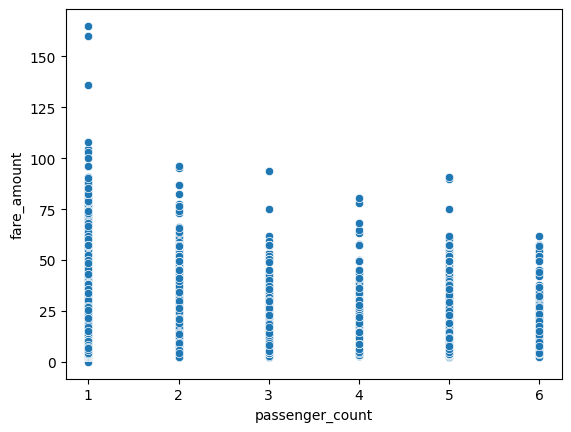

In [385]:
sns.scatterplot(df, x="passenger_count", y="fare_amount")

<Axes: xlabel='distance', ylabel='fare_amount'>

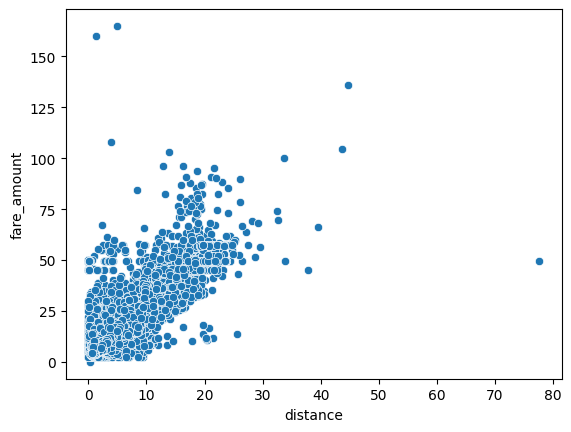

In [386]:
sns.scatterplot(df, x="distance", y="fare_amount")

<Axes: xlabel='fare_amount', ylabel='Count'>

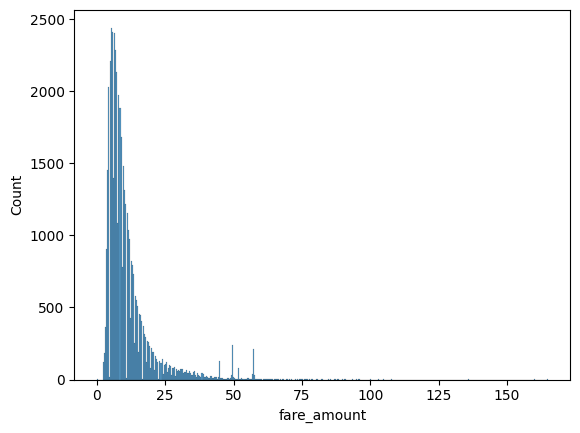

In [387]:
sns.histplot(df["fare_amount"])

In [396]:
df.drop("pickup_datetime", axis=1, inplace=True)

In [397]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,year,day_of_week
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,2009,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,2011,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,2012,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,2010,1


In [398]:
X = df.drop("fare_amount", axis=1)
y = df["fare_amount"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [399]:
from scipy.stats import boxcox

In [400]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [401]:
y_train_transformed, lambda_y = boxcox(y_train)

<Axes: ylabel='Count'>

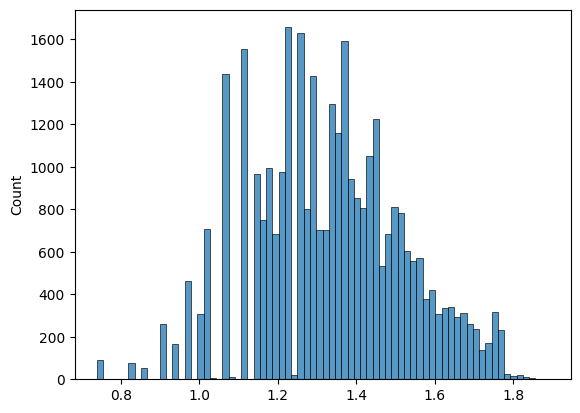

In [402]:
sns.histplot(y_train_transformed)

In [403]:
from xgboost import XGBRegressor

In [404]:
model = XGBRegressor()
model.fit(X_train, y_train_transformed)
y_pred_transformed = model.predict(X_test)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(r2_score(y_test, y_pred_original))

0.8574443419945126


In [405]:
param_grid = {
    # 1. Ağaç Yapısı Parametreleri (Overfitting Kontrolü)
    'max_depth': [3, 5, 7],               # Maksimum ağaç derinliği. Daha derin ağaçlar daha karmaşıktır (aşırı uyum riski). 
                                          # [3, 5] başlangıç için harika, [7] denenebilir.

    'min_child_weight': [1, 5, 10],       # Bir yaprak düğümündeki minimum örnek ağırlığı. Aşırı uyumu azaltır.

    'gamma': [0, 0.1, 0.5],               # Bir bölünme yapmak için gereken minimum kayıp azalması (loss reduction). 
                                          # Daha yüksek değerler daha muhafazakar bir model sağlar.

    # 2. Genel Model Parametreleri (Hız ve Kesinlik Dengesi)
    'learning_rate': [0.01, 0.05, 0.1],   # Modelin her adımda ne kadar öğrendiği. Düşük hız = daha iyi genelleme (ama daha yavaş).
    
    'n_estimators': [100, 500, 1000],     # Kullanılacak ağaç sayısı. Ne kadar çoksa o kadar iyi (ama o kadar yavaş).
                                          # Early Stopping kullanıyorsanız çok yüksek tutabilirsiniz.

    # 3. Örnekleme Parametreleri (Varyasyonu Artırma)
    'subsample': [0.6, 0.8, 1.0],         # Ağaç oluşturulurken kullanılacak örneklerin oranı. Aşırı uyumu azaltır.
    
    'colsample_bytree': [0.6, 0.8, 1.0]   # Ağaç oluşturulurken kullanılacak özelliklerin (sütunların) oranı.
}

In [406]:
from sklearn.model_selection import GridSearchCV

In [407]:
grid = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid)
grid.fit(X_train, y_train_transformed)
y_pred_transformed = grid.predict(X_test)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)


In [408]:
grid.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 500,
 'subsample': 0.6}

In [409]:
r2_score(y_test, y_pred_original)

0.8595691498062359